In [95]:
# installs
!pip install catboost
!pip install xgboost

# imports
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import catboost as cb 
from catboost.datasets import *
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [50]:
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
cv = KFold(n_splits = 5, shuffle = True)

In [85]:
SEED = 10

In [2]:
df = pd.read_csv(r'./data/table_data.csv', sep=',')
df

,CO_PROFESSOR,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006,TX_RESP_Q007,TX_RESP_Q008,TX_RESP_Q009,...,TX_RESP_Q118,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,PercentagemAlunosAcimaDaMediaNoEstado,classe
0,2017453657,1,5,0,5.0,4,1,1,0,0,...,10,10,5,5,5,3,5,4,65.217391,1.0
1,2017034727,1,5,0,5.0,4,1,1,0,0,...,10,10,5,5,5,3,5,4,65.217391,1.0
2,2017027713,1,5,0,5.0,4,1,1,0,0,...,10,10,5,5,5,3,5,4,65.217391,1.0
3,2017176352,1,2,0,5.0,2,4,1,3,3,...,10,10,5,5,5,4,5,5,80.000000,1.0
4,2017439308,1,4,0,5.0,4,1,1,2,3,...,10,10,5,5,5,3,5,5,76.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431,2017055740,1,3,0,5.0,4,3,1,1,0,...,10,10,5,5,5,2,5,3,24.000000,0.0
10432,2017013304,1,3,0,5.0,4,3,1,1,0,...,10,10,5,5,5,2,5,3,24.000000,0.0
10433,2017283080,1,3,0,5.0,4,3,1,1,0,...,10,10,5,5,5,2,5,3,24.000000,0.0
10434,2017290546,1,4,0,5.0,4,1,1,2,3,...,10,10,5,5,5,4,5,4,14.285714,0.0


In [3]:
# Acredita-se que a análise do perfil de professores cujos percentuais de alunos acima da média fossem superiores a 65% 
#(ou seja, classificados como "Maior que 65%") pode levantar alguns indicadores quanto as causas que influenciam 
#positivamente o processo de ensino-aprendizagem dos estudantes.

In [4]:
# Criando a matriz X com os dados dos questionários de cada professor
X = df.loc[:, 'TX_RESP_Q001':'TX_RESP_Q125'].values.astype(int)
X

array([[1, 5, 0, ..., 3, 5, 4],
       [1, 5, 0, ..., 3, 5, 4],
       [1, 5, 0, ..., 3, 5, 4],
       ...,
       [1, 3, 0, ..., 2, 5, 3],
       [1, 4, 0, ..., 4, 5, 4],
       [0, 4, 2, ..., 3, 5, 4]])

In [5]:
# normalizando os valores de X
norm = np.linalg.norm(X)

normal_X = X/norm

normal_X

array([[0.00019954, 0.00099772, 0.        , ..., 0.00059863, 0.00099772,
        0.00079818],
       [0.00019954, 0.00099772, 0.        , ..., 0.00059863, 0.00099772,
        0.00079818],
       [0.00019954, 0.00099772, 0.        , ..., 0.00059863, 0.00099772,
        0.00079818],
       ...,
       [0.00019954, 0.00059863, 0.        , ..., 0.00039909, 0.00099772,
        0.00059863],
       [0.00019954, 0.00079818, 0.        , ..., 0.00079818, 0.00099772,
        0.00079818],
       [0.        , 0.00079818, 0.00039909, ..., 0.00059863, 0.00099772,
        0.00079818]])

In [6]:
# Criando o array y com os valores da porcentagem de alunos com notas maiores que a média por professor 
y = df['classe'].values.astype(int)
y

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
# separando em conjuntos de teste e treino
X_train, X_test, y_train, y_test = train_test_split(normal_X, y, test_size=0.2, random_state=0) 

In [8]:
## Modelos e Treinamento

In [9]:
#######################################################################################################################

In [10]:
# 1 - CatBoost Classifier

In [111]:
# Criando e treinando modelo
maior=0
for iterator in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]:
    for learning_rate in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]:
        for depth in [2, 3, 4, 5, 6, 7]:
            cat_boost_model = cb.CatBoostClassifier(iterations=iterator, learning_rate=learning_rate, depth=depth, verbose=False, loss_function='MultiClass')
            cat_boost_model.fit(X_train, y_train)
            score=cross_val_score(cat_boost_model, X_train, y_train, cv=cv)
            
            if maior < score.mean():
                txt='iterator: {} | learning_rate: {} | depth: {}'.format(iterator, learning_rate, depth)
                maior=score.mean()
                            
print('The best is {}'.format(txt))
            

The best is iterator: 15 | learning_rate: 0.6 | depth: 7


In [106]:
cat_boost_model = cb.CatBoostClassifier(verbose=False, loss_function='MultiClass')
cat_boost_model.fit(X_train, y_train)
intervalo(cross_val_score(cat_boost_model, X_train, y_train, cv=cv))

# Melhor modelo
# iterator: 15 | learning_rate: 0.9 | depth: 7
# Acurácia média: 82.83%
# Intervalo de acurácia: [80.86% ~ 84.81%]

Acurácia média: 90.50%
Intervalo de acurácia: [89.64% ~ 91.36%]


In [14]:
# 2 - SVC - Support Vector Classifier

In [79]:
# Criando e treinando modelo
kernels=['linear', 'poly', 'rbf', 'sigmoid']
degrees=[1, 2, 3, 4]
def svc_tests():
    for kernel in kernels:
        for degree in degrees:
            svc_model = SVC(kernel=kernel, degree=degree)
            svc_model.fit(X_train, y_train)
            print('Kernel: {} | Degree: {}'.format(kernel, degree))
            print(intervalo(cross_val_score(svc_model, X_train, y_train, cv=cv)))
svc_tests()

Kernel: linear | Degree: 1
Acurácia média: 54.49%
Intervalo de acurácia: [54.20% ~ 54.78%]
None
Kernel: linear | Degree: 2
Acurácia média: 54.49%
Intervalo de acurácia: [52.68% ~ 56.31%]
None
Kernel: linear | Degree: 3
Acurácia média: 54.49%
Intervalo de acurácia: [51.94% ~ 57.04%]
None
Kernel: linear | Degree: 4
Acurácia média: 54.49%
Intervalo de acurácia: [51.26% ~ 57.73%]
None
Kernel: poly | Degree: 1
Acurácia média: 72.05%
Intervalo de acurácia: [69.66% ~ 74.45%]
None
Kernel: poly | Degree: 2
Acurácia média: 74.84%
Intervalo de acurácia: [71.85% ~ 77.84%]
None
Kernel: poly | Degree: 3
Acurácia média: 77.00%
Intervalo de acurácia: [75.41% ~ 78.59%]
None
Kernel: poly | Degree: 4
Acurácia média: 79.26%
Intervalo de acurácia: [77.42% ~ 81.11%]
None
Kernel: rbf | Degree: 1
Acurácia média: 75.25%
Intervalo de acurácia: [73.06% ~ 77.45%]
None
Kernel: rbf | Degree: 2
Acurácia média: 75.44%
Intervalo de acurácia: [74.52% ~ 76.36%]
None
Kernel: rbf | Degree: 3
Acurácia média: 75.30%
Interva

In [84]:
degrees=[5, 6, 7, 8, 9, 10]
for degree in degrees:
    svc_model = SVC(kernel='poly', degree=degree)
    svc_model.fit(X_train, y_train)
    print('Degree: {}'.format(degree))
    print(intervalo(cross_val_score(svc_model, X_train, y_train, cv=cv)))

Degree: 5
Acurácia média: 80.43%
Intervalo de acurácia: [78.98% ~ 81.87%]
None
Degree: 6
Acurácia média: 81.82%
Intervalo de acurácia: [81.35% ~ 82.28%]
None
Degree: 7
Acurácia média: 83.07%
Intervalo de acurácia: [81.71% ~ 84.43%]
None
Degree: 8
Acurácia média: 83.56%
Intervalo de acurácia: [82.35% ~ 84.78%]
None
Degree: 9
Acurácia média: 84.30%
Intervalo de acurácia: [83.30% ~ 85.29%]
None


In [ ]:
# Melhor modelo:
# Degree: 9
# Acurácia média: 84.30%
# Intervalo de acurácia: [83.30% ~ 85.29%]

In [18]:
#######################################################################################################################

In [19]:
# 3 - XGBoost Classifier

In [20]:
# Criando e treinando modelo
xg_boost_model = XGBClassifier(use_label_encoder=False)
xg_boost_model.fit(X_train, y_train)

[18:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9137931034482759

In [21]:
# Cross Validation
scores = cross_val_score(xg_boost_model, X_train, y_train, cv=cv)
scores

[18:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.784689  , 0.81578947, 0.78229665, 0.81534772, 0.79376499])

In [22]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) # 0.80 accuracy with a standard deviation of 0.01

0.80 accuracy with a standard deviation of 0.01


In [23]:
#######################################################################################################################

In [24]:
# 4 - Random Forest Classifier

In [88]:
# Criando e treinando modelo
n_estimators=[10, 25, 50, 100, 125, 150, 200]
criterions=['gini', 'entropy']

def rf_test():
    for criterion in criterions:
       for estimator in n_estimators: 
            randon_forest_model = RandomForestClassifier(n_estimators=estimator, criterion=criterion, random_state=SEED)
            randon_forest_model.fit(X_train, y_train)
            
            print('n_estimators: {} | criterion: {}'.format(estimator, criterion))
            print(intervalo(cross_val_score(randon_forest_model, X_train, y_train, cv=cv)))
            
rf_test()


n_estimators: 10 | criterion: gini
Acurácia média: 89.32%
Intervalo de acurácia: [86.78% ~ 91.85%]
None
n_estimators: 25 | criterion: gini
Acurácia média: 89.97%
Intervalo de acurácia: [89.13% ~ 90.82%]
None
n_estimators: 50 | criterion: gini
Acurácia média: 90.18%
Intervalo de acurácia: [89.61% ~ 90.74%]
None
n_estimators: 100 | criterion: gini
Acurácia média: 90.23%
Intervalo de acurácia: [88.50% ~ 91.95%]
None
n_estimators: 125 | criterion: gini
Acurácia média: 90.03%
Intervalo de acurácia: [88.40% ~ 91.67%]
None
n_estimators: 150 | criterion: gini
Acurácia média: 89.94%
Intervalo de acurácia: [87.86% ~ 92.02%]
None
n_estimators: 200 | criterion: gini
Acurácia média: 90.30%
Intervalo de acurácia: [89.05% ~ 91.55%]
None
n_estimators: 10 | criterion: entropy
Acurácia média: 89.28%
Intervalo de acurácia: [88.82% ~ 89.74%]
None
n_estimators: 25 | criterion: entropy
Acurácia média: 90.12%
Intervalo de acurácia: [88.44% ~ 91.79%]
None
n_estimators: 50 | criterion: entropy
Acurácia média: 

In [26]:
# Melhor modelo: 
# n_estimators: 200 | criterion: entropy
# Acurácia média: 90.33%
# Intervalo de acurácia: [89.21% ~ 91.46%]

array([0.78947368, 0.83253589, 0.784689  , 0.8057554 , 0.82254197])

In [28]:
#######################################################################################################################

In [29]:
# 5 - Gaussian Naive Bayes

In [91]:
# Criando e treinando modelo
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [92]:
# Cross Validation
scores = cross_val_score(gnb_model, X_train, y_train, cv=cv)
scores

array([0.55508982, 0.54311377, 0.57904192, 0.57878969, 0.55122828])

In [93]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())) # 0.58 accuracy with a standard deviation of 0.02

0.56 accuracy with a standard deviation of 0.01


In [33]:
#######################################################################################################################

In [34]:
# 6 - Nearest Neighbors

In [109]:
# Criando e treinando modelo

for weights in ["uniform", "distance"]:
    for n_neighbors in [10, 15, 20, 30, 40, 75, 100, 150, 180, 200]:
        nn_model = KNeighborsClassifier(n_neighbors, weights=weights).fit(X_train, y_train)
        print('Weights: {} | n_neighbors: {}'.format(weights, n_neighbors))
        print(intervalo(cross_val_score(nn_model, X_train, y_train, cv=cv)))

Weights: uniform | n_neighbors: 10
Acurácia média: 73.75%
Intervalo de acurácia: [73.36% ~ 74.15%]
None
Weights: uniform | n_neighbors: 15
Acurácia média: 72.68%
Intervalo de acurácia: [70.24% ~ 75.12%]
None
Weights: uniform | n_neighbors: 20
Acurácia média: 70.24%
Intervalo de acurácia: [68.47% ~ 72.01%]
None
Weights: uniform | n_neighbors: 30
Acurácia média: 68.72%
Intervalo de acurácia: [66.05% ~ 71.40%]
None
Weights: uniform | n_neighbors: 40
Acurácia média: 68.23%
Intervalo de acurácia: [66.76% ~ 69.71%]
None
Weights: uniform | n_neighbors: 75
Acurácia média: 67.02%
Intervalo de acurácia: [63.91% ~ 70.13%]
None
Weights: uniform | n_neighbors: 100
Acurácia média: 66.73%
Intervalo de acurácia: [64.54% ~ 68.93%]
None
Weights: uniform | n_neighbors: 150
Acurácia média: 65.91%
Intervalo de acurácia: [63.85% ~ 67.97%]
None
Weights: uniform | n_neighbors: 180
Acurácia média: 65.61%
Intervalo de acurácia: [62.59% ~ 68.62%]
None
Weights: uniform | n_neighbors: 200
Acurácia média: 66.12%
In

In [36]:
# Melhor modelo:
# Weights: distance | n_neighbors: 15
# Acurácia média: 87.48% 
# Intervalo de acurácia: [84.60% ~ 90.37%]

array([0.5861244 , 0.57416268, 0.59808612, 0.58752998, 0.53477218])

In [38]:
#######################################################################################################################

In [39]:
# Melhor acurácia obtida foi no modelo "randon_forest_model" com acurácia média: 87.48% 
# Explicando o modelo com SHAP

In [40]:
feat_names = df.loc[:, 'TX_RESP_Q001':'TX_RESP_Q125'].columns.values

In [96]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(randon_forest_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of X_test rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
klass = 1
shap.summary_plot(shap_values[klass], X_test, feature_names=feat_names)

KeyboardInterrupt: 

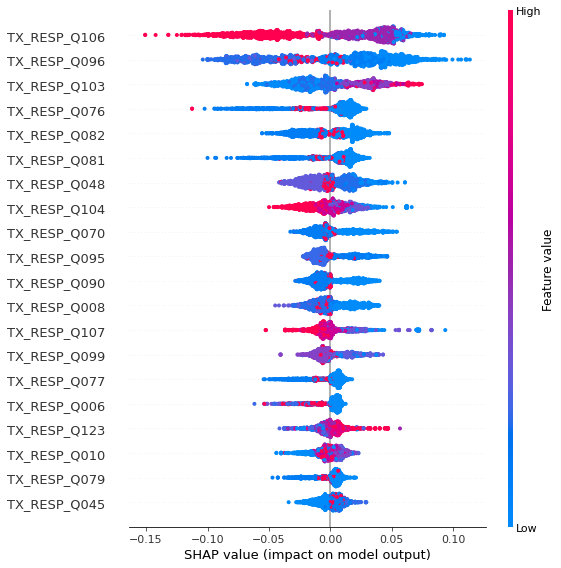

In [42]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(randon_forest_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of X_test rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
klass = 0
shap.summary_plot(shap_values[klass], X_test, feature_names=feat_names)